In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline 

In [2]:
df = pd.read_csv("./weather.csv")
df.head()

,s_id,date,element_type,value
0,USW00094889,11/12/14,TMAX,22
1,USC00208972,4/29/09,TMIN,56
2,USC00200032,5/26/08,TMAX,278
3,USC00205563,11/11/05,TMAX,139
4,USC00200230,2/27/14,TMAX,-106


In [3]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%y")
df.head()

,s_id,date,element_type,value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [60]:
df.shape

(165085, 4)

In [17]:
print(df[(df['date'].dt.month != 2) & (df['date'].dt.day != 29)].shape)

(147475, 4)


In [18]:
clean_data = df[(df['date'].dt.month != 2) & (df['date'].dt.day != 29)]
clean_data.shape

(147475, 4)

In [19]:
data_max = clean_data[clean_data["element_type"] == "TMAX"]
data_min = clean_data[clean_data["element_type"] == "TMIN"]
print(data_min.shape)
print(data_max.shape)

(73288, 4)
(74187, 4)


In [20]:
data_max = data_max[data_max["date"].dt.year < 2015]
data_min = data_min[data_min["date"].dt.year < 2015]
print(data_min.shape)
print(data_max.shape)

(67190, 4)
(68014, 4)


In [21]:
sort_max = data_max.sort_values(['s_id', 'date'])
sort_min = data_min.sort_values(['s_id', 'date'])

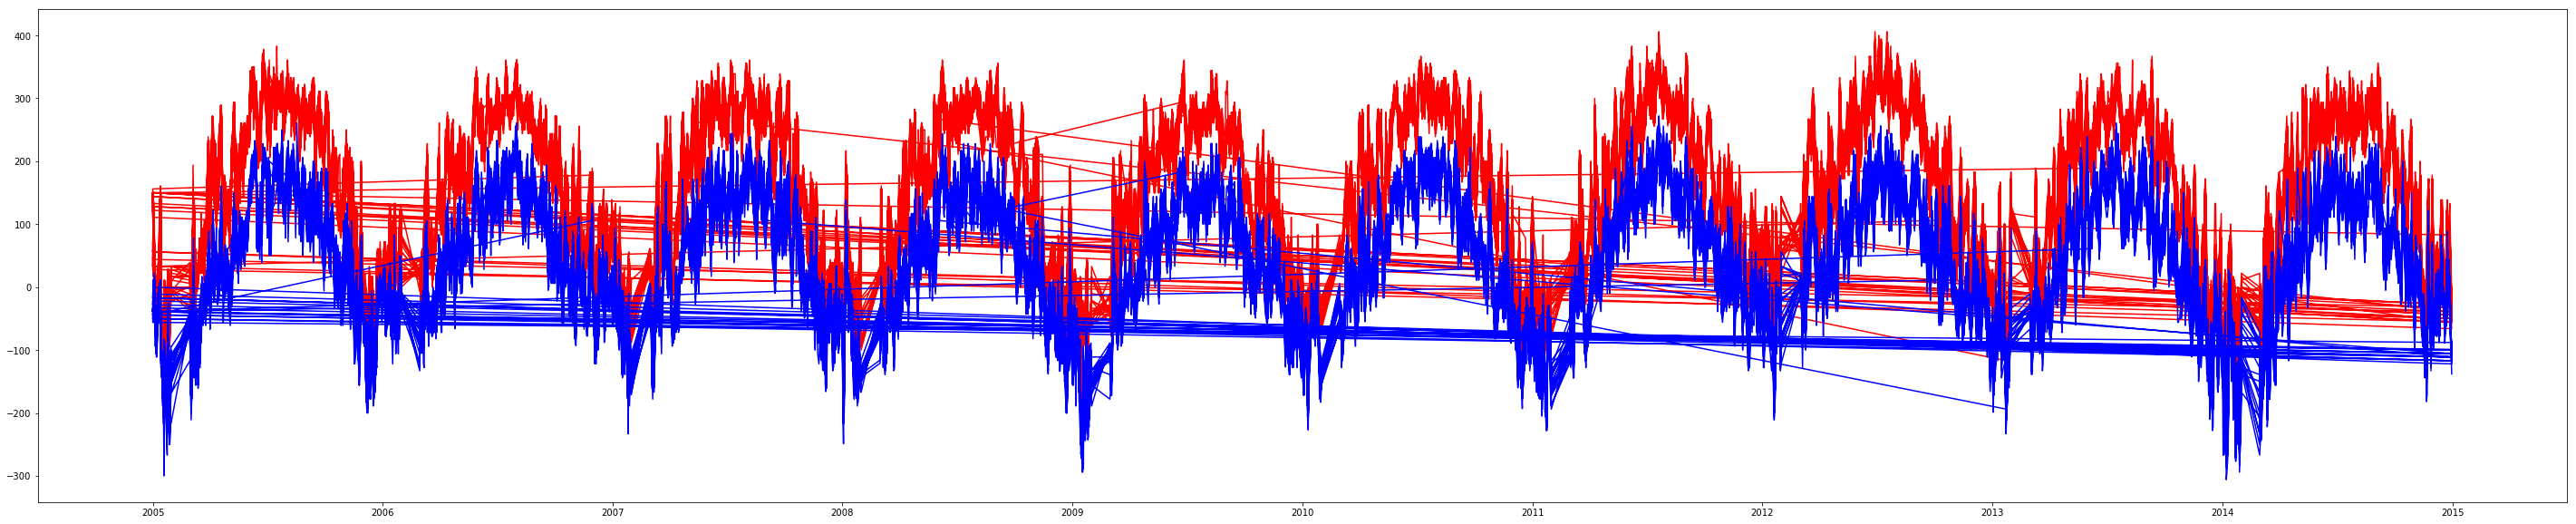

In [22]:
fig, ax = plt.subplots(figsize=(50,10))

ax.plot(sort_max['date'], sort_max['value'],'r-')
ax.plot(sort_min['date'], sort_min['value'],'b-')

In [23]:
group_max = data_max.groupby(['date'])['value'].max()
group_min = data_min.groupby(['date'])['value'].min()

In [43]:
group_max.head()

,date,value
0,2005-01-01,156
1,2005-01-02,139
2,2005-01-03,133
3,2005-01-04,39
4,2005-01-05,33


In [25]:
group_max = group_max.reset_index()
group_min = group_min.reset_index()

In [44]:
group_max.head()

,date,value
0,2005-01-01,156
1,2005-01-02,139
2,2005-01-03,133
3,2005-01-04,39
4,2005-01-05,33


In [53]:
# the supposed plot??

data_max['month'] = data_max['date'].dt.month
data_min['month'] = data_min['date'].dt.month
data_max['day'] = data_max['date'].dt.day
data_min['day'] = data_min['date'].dt.day
trial = data_max.groupby(['month','day'])['value'].max()
trial2 = data_min.groupby(['month','day'])['value'].min()
print(trial.shape)
print(trial2.shape)

(326,)
(326,)


In [65]:
trial = trial.reset_index()
trial2 = trial2.reset_index()

In [69]:
print(trial.head(5))


   month  day  value
0      1    1    156
1      1    2    139
2      1    3    133
3      1    4    106
4      1    5    128


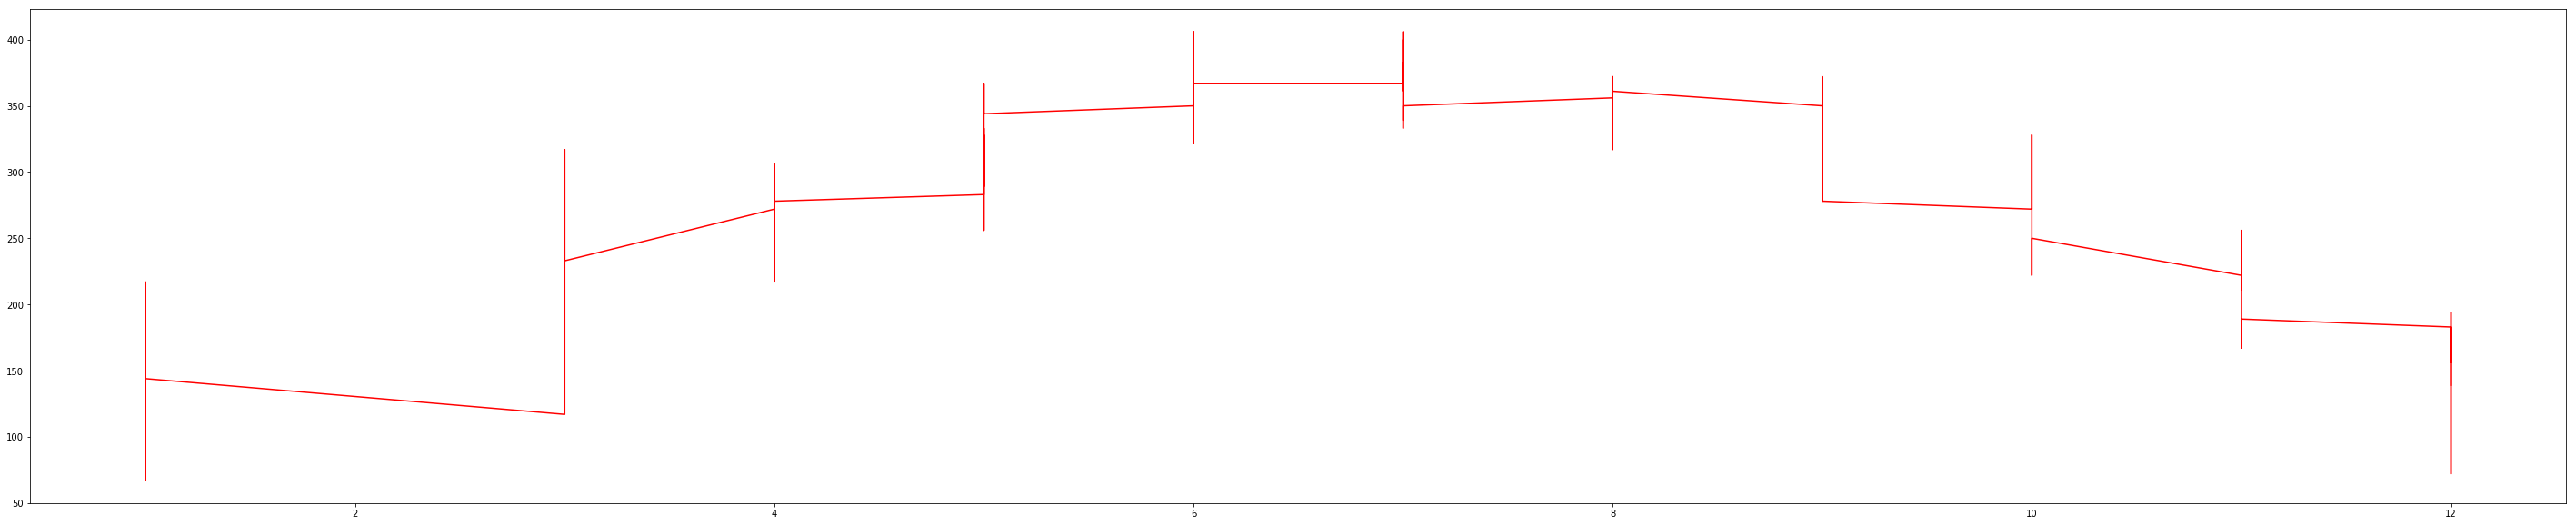

In [70]:
fig, ax = plt.subplots(figsize=(50,10))

ax.plot(trial['month'], trial['value'],'r-')
#ax.plot(group_min['date'], group_min['value'],'b-')

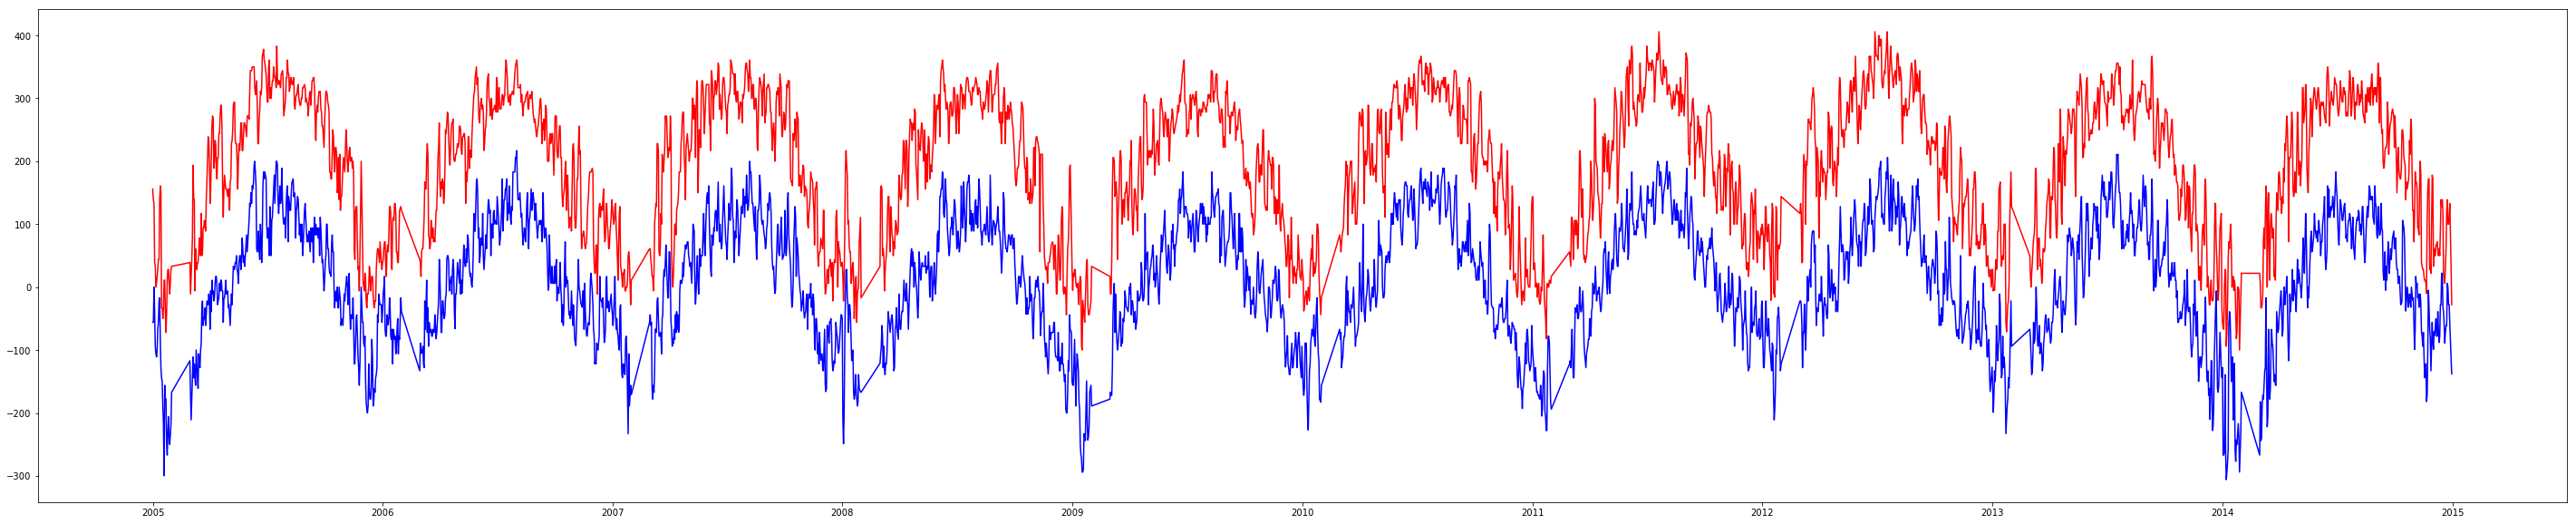

In [27]:
fig, ax = plt.subplots(figsize=(50,10))

ax.plot(group_max['date'], group_max['value'],'r-')
ax.plot(group_min['date'], group_min['value'],'b-')

In [40]:
min_temp = min(group_min['value'])
max_temp = max(group_max['value'])
print(min_temp)
print(max_temp)

-306
406


In [29]:
data_2015 = clean_data[clean_data["date"].dt.year == 2015]
print(data_2015.shape)

(12271, 4)


In [45]:
max_2015 = data_2015[data_2015["element_type"] == "TMAX"]
min_2015 = data_2015[data_2015["element_type"] == "TMIN"]
print(max_2015.head())
print(min_2015.head())

            s_id       date element_type  value
30   USC00203712 2015-03-17         TMAX    189
51   USC00205563 2015-01-03         TMAX     22
59   USC00202308 2015-08-30         TMAX    261
126  USC00200032 2015-06-06         TMAX    233
146  USC00208972 2015-04-09         TMAX     67
           s_id       date element_type  value
19  USC00205563 2015-01-03         TMIN    -39
34  USC00200032 2015-06-06         TMIN    128
46  USW00014833 2015-08-30         TMIN    178
50  USC00202308 2015-08-30         TMIN    156
72  USC00200230 2015-04-01         TMIN    -17


In [47]:
max_2015 = max_2015.sort_values(['s_id', 'date'])
min_2015 = min_2015.sort_values(['s_id', 'date'])
group_max_2015 = max_2015.groupby(['date'])['value'].max()
group_min_2015 = min_2015.groupby(['date'])['value'].min()
group_max_2015 = group_max_2015.reset_index()
group_min_2015 = group_min_2015.reset_index()
print(group_max_2015.head())
print()
print(group_min_2015.head())

        date  value
0 2015-01-01     11
1 2015-01-02     39
2 2015-01-03     39
3 2015-01-04     44
4 2015-01-05     28

        date  value
0 2015-01-01   -133
1 2015-01-02   -122
2 2015-01-03    -67
3 2015-01-04    -88
4 2015-01-05   -155


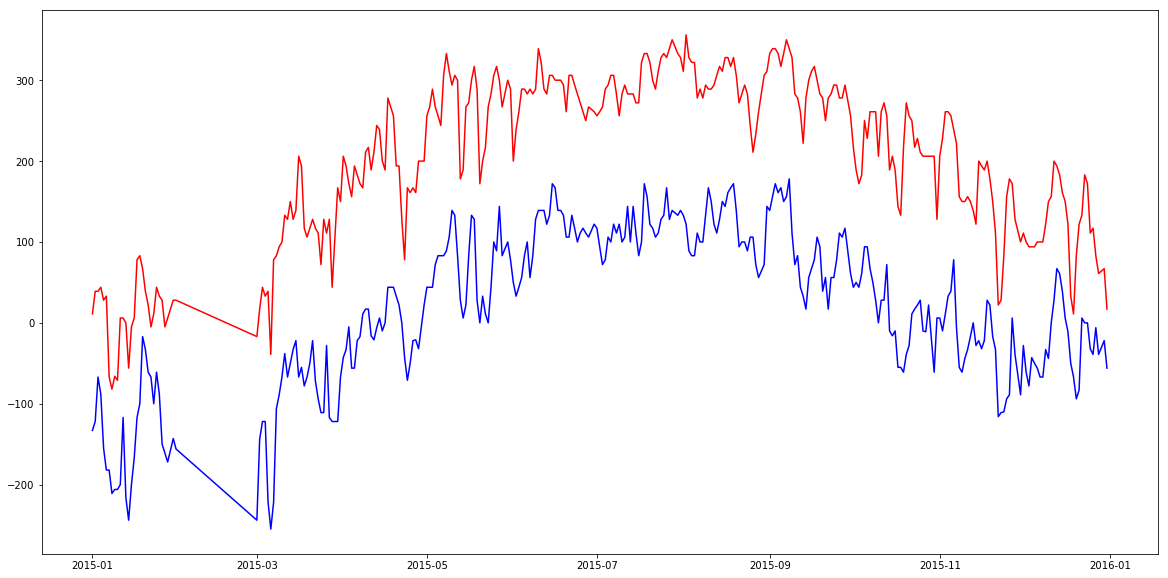

In [32]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(group_max_2015['date'], group_max_2015['value'],'r-')
ax.plot(group_min_2015['date'], group_min_2015['value'],'b-')

In [42]:
max_values = max_2015[max_2015['value'] > max_temp]
min_values = min_2015[min_2015['value'] < min_temp]
print(max_values.shape)
print(min_values.shape)

(0, 4)
(0, 4)


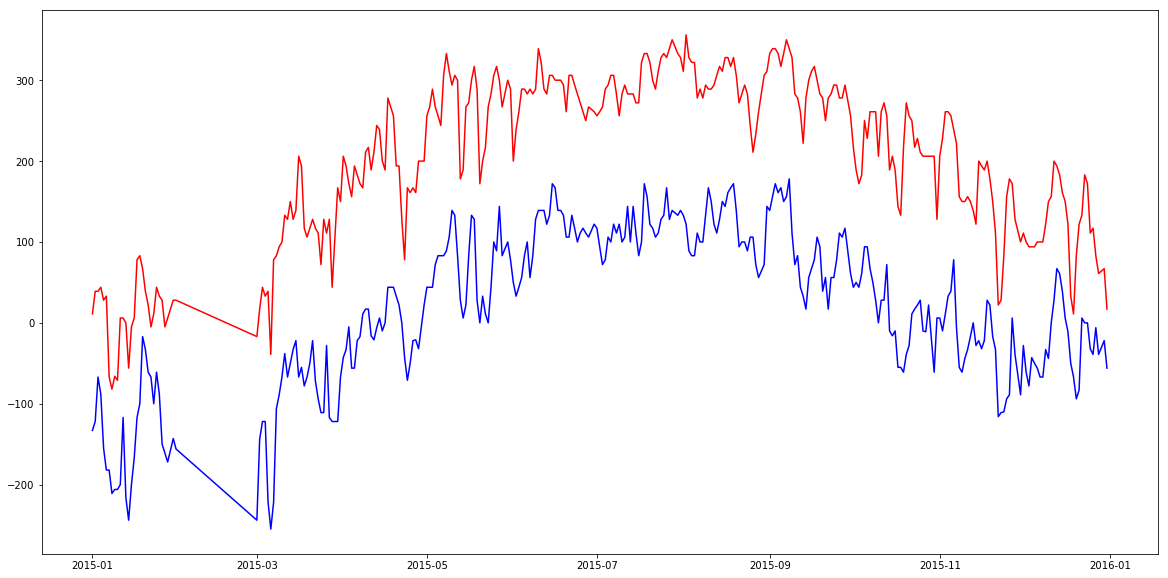

In [34]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(group_max_2015['date'], group_max_2015['value'],'r-', max_values['date'], max_values['value'],'r*')
ax.plot(group_min_2015['date'], group_min_2015['value'],'b-',min_values['date'], min_values['value'],'b*')